# Simulations du signal initial idéal

## Table des matières 
+ [Fonction de Transfert](#fonction-de-transfert)
    + [imports](#imports)
    + [Définition de la fonction de transfert](#définition-de-la-fonction-de-transfert)
+ [Signaux d'entrée et de sortie](#signaux-dentrée-et-de-sortie)
+ [Simulation de la fonction de transfert](#simulation-de-la-fonction-de-transfert)
+ [Problèmes](#problèmes-remarqués)

## Fonction de Transfert
Calcul de la fonction de transfert et affichage des lieu de Bodes
### imports
Import des package néecessaires

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

### Définition de la fonction de transfert
On définit une fonction permettant de tracer la fonction de transfert à partir d'un échantillon dans le temps. La formule utilisée est la suivante :

$$ H(j\omega) = \frac{1}{1+jQ(x-1/x)}  $$

où $x=\omega / \omega_0$. On utilise la précision machine de 1e-16 pour éviter les divisions par 0

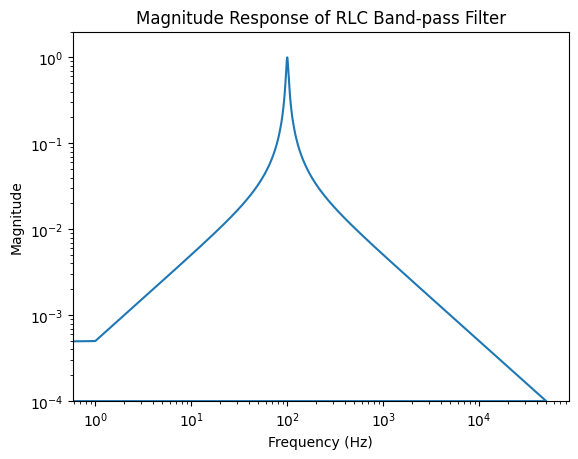

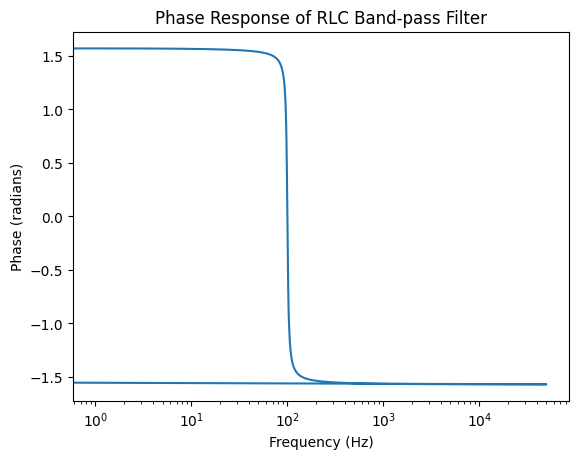

In [67]:
# Define the transfer function in terms of the central frequency and quality factor
def transfer_function(f, f0, Q):
    w0 = 2 * np.pi * f0
    w = 2 * np.pi * f
    x= w/w0
    return 1/(1+1.j*Q*(x-1/(x+1e-16)))

N = 100000 # number of points

t = np.linspace(0, 1, N, endpoint=False) # Definition of time vector
frequencies = np.fft.fftfreq(len(t), d=t[1]-t[0]) # Definition of associated frequencies vector

# Parameters of transfer function
Q = 20
f0 = 100

TF_values = transfer_function(frequencies, f0, Q) # Calculation of trnasfert function (TF :TransferFunction)
transNorm = np.absolute(TF_values)
transAngle = np.angle(TF_values)



# Plot the Bode diagrams
plt.figure()
plt.loglog(frequencies, transNorm)
plt.ylim(0.0001, 2)
plt.title('Magnitude Response of RLC Band-pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.grid(which='both', axis='both')

plt.figure()
plt.semilogx(frequencies, transAngle)
plt.xscale('log')
plt.title('Phase Response of RLC Band-pass Filter' )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
# plt.grid(which='both', axis='both')
plt.show()

## Signaux d'entrée et de sortie
On définit un signal d'entrée arbitraire. Ensuite, on le transforme dans l'espace des fréquence et on le multiplie par la fonciton de transfert pour obtenir le signal de sortie

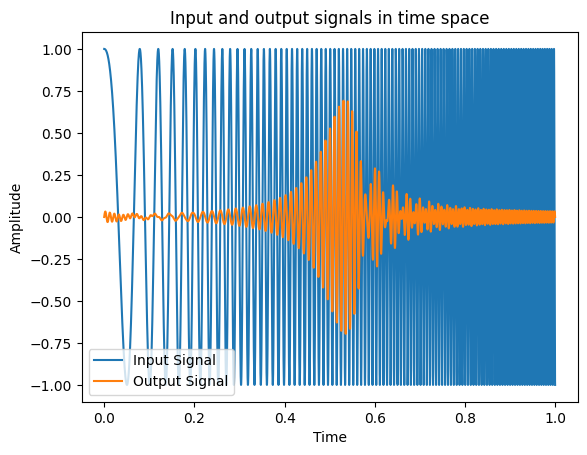

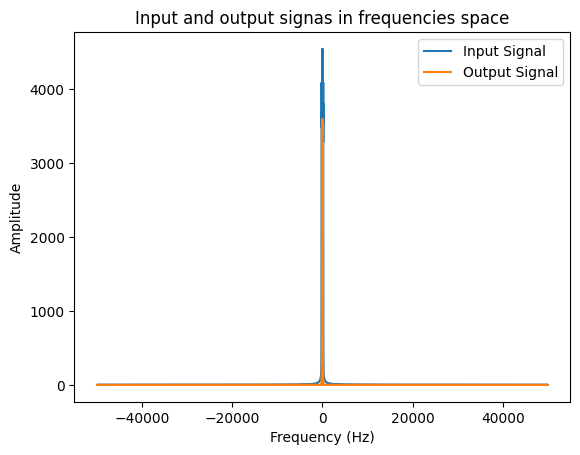

In [68]:
# Generate input signal

# input_signal = np.sin(2*np.pi*30*t) # Sin pur

# input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # Combinaison de sin

# input_signal = np.random.normal(0, 1, N) # White noise

frequency_start = 5  # Starting frequency in Hz
frequency_end = 200  # Ending frequency in Hz
input_signal = chirp(t, f0=frequency_start, f1=frequency_end, t1=1, method='linear') # Chirp

# Apply the Fourier transform to the input signal
input_signal_freq = np.fft.fft(input_signal)

# Apply the transfer function to the input signal in the frequency domain
output_signal_freq = input_signal_freq * TF_values

# Convert the output signal back to the time domain
output_signal = np.real(np.fft.ifft(output_signal_freq))

# Plot the signals in time and frequencies spaces
# Time space
plt.figure()
plt.plot(t, input_signal, label='Input Signal')
plt.plot(t, output_signal, label='Output Signal')
plt.title('Input and output signals in time space')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
# Frequencies space
plt.figure()
plt.plot(frequencies, np.absolute(input_signal_freq), label='Input Signal')
plt.plot(frequencies, np.absolute(output_signal_freq),label='Output Signal')
plt.title('Input and output signas in frequencies space')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.show()


## Simulation de la fonction de transfert
On essaie de regénérer la fonction de transfert à partir des signaux d'entrées et de sorties dans l'espace des fréquences en sachant que 

$$ \overline{V}_s(\omega) = H(\omega)\overline{V}_i(\omega) $$

on peut alors en déduire

$$ H(\omega) = \frac{\overline{V}_s(\omega)}{\overline{V}_i(\omega)} $$

où $\overline{V}_s(\omega)$ et $\overline{V}_i(\omega)$ sont les signaux d'entrée et de sortie respectivement dans l'espace des fréquences. La fréquence centrale $f_0$ est approximée par la fréquence associée à la valeur maximale de la fonction de transfert. La largeur de bande $\beta$ est approximée par la différence entre les fréquences où l'amplitude de la fonction de transfert a diminuée de $1/\sqrt{2}$. Q est ensuite calculée à partir de sa définition $Q=\omega_0/\beta$.

f0 réel : 100, f0 approx : 99900
Q réel : 20, Q approx : -497.0149253731343


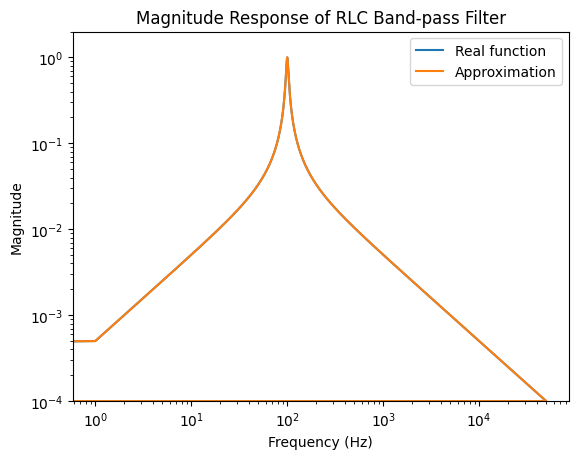

In [69]:
TF_approx = output_signal_freq/input_signal_freq # Transfer function approximation


TF_approx_norm = np.absolute(TF_approx)
TF_approx_angle = np.angle(TF_approx)

# Calculation of Q and f_0
max_TF_approx= max(TF_approx_norm)
f0_approx = np.argmax(TF_approx_norm) #f0

threshold = 1/np.sqrt(2)
target_norm = threshold * max_TF_approx

# Lower frequency
lower_bandwidth_index = (np.abs(np.array(TF_approx_norm[:f0_approx]) - target_norm)).argmin()
lower_bandwidth_freq = frequencies[lower_bandwidth_index]

# Upper frequency
upper_bandwidth_index = (np.abs(np.array(TF_approx_norm[f0_approx:]) - target_norm)).argmin() + f0_approx
upper_bandwidth_freq = frequencies[upper_bandwidth_index]

beta_approx = upper_bandwidth_freq - lower_bandwidth_freq

Q_approx = f0_approx/beta_approx

print(f'f0 réel : {f0}, f0 approx : {f0_approx}')
print(f'Q réel : {Q}, Q approx : {Q_approx}')


# Plot transfer function norm and its approximation
plt.figure()
plt.loglog(frequencies, transNorm, label = 'Real function')
plt.loglog(frequencies, TF_approx_norm, label = 'Approximation')
plt.ylim(0.0001,2)
plt.title('Magnitude Response of RLC Band-pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
# plt.grid(which='both', axis='both')


on peut voir que les deux courbes sont exactements supperposées. C'est peut-être normal, car nous avons calculé la fonction de transfert en utilisant une équation exacte, mais cela soulève quelques problèmes. 

## Problèmes remarqués 
+ Si on peut toujours trouver la fonction de transfert exacte à partir des signaux d'entrée et de sortie, comment simuler le type de signal idéal? Ne vont-ils pas tous donner les mêmes valeurs de $Q$ et $\omega_0$?
+ Utilise-t-on la bonne méthode pour approximer la fonction de transfert? Peut-être il ne faut pas utiliser la définition à partir des signaux d'entrée et de sortie, mais je ne vois pas comment on pourrait faire autrement.
+ On remarque qu'il y a toujours une droite constante en plus de la fonction de transfert dans tous les diagrammes de Bode. Pourquoi est-ce cela? Se pourrait-il que cela soit la cause du problème soulevé au point précédent?
+ Pas un problème, mais il reste à faire varier la longueur des signaux et l'échantillonage. Si les autres problèmes sont réglés, cette partie sera à compléter... 